# Opening Economy Extension

Business Cycles and Fluctuations - AE2E6

> **Objectives**
>
> -   Modify a modfile with a model extension.
> -   Compare model solutions for different parameterizations.

> **Modfiles**

Uncomment the following lines to install needed packages (if not already
present).

In [3]:
# uncomment the next lines, the first time you run
# import Pkg; Pkg.add(["DBnomics", "Dynare", "DataFrames"])

# Small Open Economy

Start from the same rbc [model](rbc_fixed.mod). Assume the
representative agent can save $b^{\star}_t$ as foreign assets,
remunerated at a constant interest rate $r^{\star}-1$.

**Write the new budget constraint for the representative household.**

> **Correction**
>
> At given date t, the household saves $b^{\star}_t$ in the foreigh
> country and receives repayment $b^{\star}_{t-1}$ plus interests
> $(r^{\star} − 1)b^{\star}_{t-1}$ . Starting from the RBC constraint,
> the new constraint becomes:
> $$c_t + i_t + b^ {\star}_t \leq w_t n_t + r_t k_{t-1} + r^ {\star} b^{\star}_{t-1}$$
>
> and the lagrangian is:
>
> $$\mathcal{L} = E_t \sum_{j=0}^\infty \beta^j\left[\log c_{t+j} + \chi \dfrac{(1-n_{t+j})^{1-\eta}}{1-\eta} \right.$$
>
> $$+\lambda_{t+j} (w_{t+j}n_{t+j} + r_{t+j}k_{t+j-1} - c_{t+j}-k_{t+j} + (1-\delta)k_{t+j-1} + r^* b^*_{t+j-1} - b^*_{t+j} )\Bigg]$$

**Write the new optimality condition.**

> **Correction**
>
> We must add the optimality condition relative to $b^{\star}_t$ : the
> representative household chooses amount of savings to maximise its
> intertemporal utility of consumption. We find :
>
> $$ -\lambda_t + \beta E_t[\lambda_{t+1}r^*]=0$$ or :
> $$ \frac{1}{c_t}=\beta r^* E_t\left[\frac{1}{c_{t+1}} \right]$$

**What is the long run constraint on interest rate $r^{\star}$?**

> **Correction**
>
> In the deterministic steady-state the euler equation implies
> $r^{\star}= \frac{1}{\beta}$ . In principle $r^{\star}$ is a a foreign
> interest rate determined by factors external to the country. Yet
> $\frac{1}{\beta}$ is the only value it can take that is compatible
> with the existence of a long run steady-state. This can be interpreted
> as an arbitrage condition: $\frac{1}{\beta}$ is the domestic intesrest
> rate. If it was lower/higher than world interest rate, there would be
> infinite capital flows from/to the country.
>
> (in a deterministic setting the arbitrage principle implies that all
> investment opportunities must yield the same return)

**Update the modfile (set $\overline{b^{\star}}=0$)**

> **Correction**
>
> To update the modfile, one must declare a new variable $b^{\star}$ and
> the new parameter $r^\star$. The latter is set to $\frac{1}{\beta}$ .
> One must also add the above optimality condition and update the
> equation characterizing the equilibrium on the goods markets. That one
> comes from the budget constraint. Rewriting the budget constraint for
> a small open economy we have:
>
> $$c_t + i_t + b^{\star}_t = w_t n_t + r_t k_{t-1} + r^{\star} b^{\star}_{t-1}$$
>
> Since we assume competitive markets, the firm doesn’t do any profit.
> We have $y_t = w_t n_t + r_t k_{t−1}$ and:
>
> $$c_t + i_t + b^{\star}_t - r^{\star} b^{\star}_{t-1} = y_t$$
>
> Next, we can observe that the static model doesn’t pin down the
> steady-state level of $b^{\star}$ ; we set it to 0, so that the
> steady-state values of all other variables ar unchanged. We thus add
> $b^{\star}=0$ in the `steady_state_model;` block.

In [1]:
using Dynare

context = @dynare "rbc_open.mod";
# saving the result in context is useful for future comparison

Dynare version: 0.9.18
2025-04-16T13:55:54.314: Starting @dynare rbc_open.mod
["rbc_open.mod", "language=julia", "json=compute"]
Dynare preprocessor version: 6.4.0+0
2025-04-16T13:55:54.388: End of preprocessing

Starting preprocessing of the model file ...
Found 9 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
6 block(s) found:
  5 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 4 equation(s)
                                 and 2 feedback variable(s).
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Normalization failed with cutoff, trying symbolic normalization...
Could not normalize the dynamic model. Variable i is not in the maximum cardinality matching.
JSON written after Computing step.
Preprocessing completed.


2025-04-16T13:55:54.427: Start parse_statements!

  Coefficients of approximate solution function (reduced form)

───────────┬─────────────────────────────────────────────────────────────────────────────
           │   y_t      i_t     c_t      n_t    a_t        b_t      k_t      r_t     w_t
─────────────────────────────────────────────────────────────────────────────────────────
      ϕ(a) │  1.2438  21.1617  0.2685    0.231  0.95  -20.1864  21.1617   0.0644  1.2796
      ϕ(b) │ -0.0077  -0.1389  0.0077  -0.0043   0.0    1.1439  -0.1389  -0.0004  0.0077
      ϕ(k) │  0.0744  -1.1189   0.008   0.0163   0.0    1.1854  -0.1439  -0.0033  0.0632
 epsilon_t │  1.3092  22.2754  0.2826   0.2431   1.0  -21.2488  22.2754   0.0678   1.347
───────────┴─────────────────────────────────────────────────────────────────────────────

  Note: ϕ(x) = x_{t-1} - steady_state(x)

  THEORETICAL MOMENTS

──────────┬─────────────────────────────
 VARIABLE │  MEAN   STD. DEV.  VARIANCE
────────────────────────────────────────
        y │    NaN        NaN    

2025-04-16T13:55:56.160: End parse_statements!
2025-04-16T13:55:56.160: End parser

longname: c
texname: c
symboltype: Endogenous
orderintype: 3
longname: b
texname: b
symboltype: Endogenous
orderintype: 6
longname: r
texname: r
symboltype: Endogenous
orderintype: 8
longname: khi
texname: khi
symboltype: Parameter
orderintype: 5
longname: a
texname: a
symboltype: Endogenous
orderintype: 5
longname: nss
texname: nss
symboltype: Parameter
orderintype: 4
longname: bet
texname: bet
symboltype: Parameter
orderintype: 1
longname: i
texname: i
symboltype: Endogenous
orderintype: 2
longname: y
texname: y
symboltype: Endogenous
orderintype: 1
longname: del
texname: del
symboltype: Parameter
orderintype: 2
endogenous_nbr: 9
exogenous_nbr: 1
lagged_exogenous_nbr: 0
exogenous_deterministic_nbr: 0
parameter_nbr: 8
original_endogenous_nbr: 9
lead_lag_incidence: [0 0 0 0 1 2 3 0 0; 4 5 6 7 8 9 10 11 12; 0 0 13 0 0 0 0 14 0]
n_static: 4
n_fwrd: 2
n_bkwrd: 3
n_both: 0
n_states: 3
DErows1: [1, 2, 3, 4, 5]
DErows2: Int64[]
n_dyn: 5
i_static: [1, 2, 4, 9]
i_dyn: [3, 5, 6, 7, 8]
i_bkwrd: 

Context(Dict{String, DynareSymbol}("c" => , "b" => , "r" => , "khi" => , "a" => , "nss" => , "bet" => , "i" => , "y" => , "del" => …), Model[], , Results(ModelResults[]), , Dict{Any, Any}(LinearRationalExpectations.LinearGsSolverWs => LinearRationalExpectations.LinearGsSolverWs(PolynomialMatrixEquations.GsSolverWs([-0.0 -65.44144306592395 63.15232318643158; 0.0 212.54490442106385 -213.12324267290856; 0.8969908102216997 104.97828081335638 -103.59687351816339], [0.34257193417969617 -0.5125980420126716 1.0590966921558524; -0.4086224242868015 -0.12043051417900291 0.0; -0.423434004723518 -0.12479583076903254 -0.0], [0.9500000000000002 0.0 0.0; -20.18635361497786 1.143948988868793 1.1854143893389981; 21.16166434266644 -0.1389137011884678 -0.14394898886885343], [0.2684694940519445 0.007704146251565051 0.00798340303024136; 0.06443203506344952 -0.0003972661959614108 -0.003271471851183866], FastLapackInterface.LUWs([2, 3, 3]), FastLapackInterface.LUWs([1, 2]), FastLapackInterface.GeneralizedSchu

**Print theoretical moments. Comment.**

> **Correction**
>
> In the output from the above question we have:
>
>     THEORETICAL MOMENTS
>
>     ──────────┬─────────────────────────────
>      VARIABLE │  MEAN   STD. DEV.  VARIANCE
>     ────────────────────────────────────────
>             y │    NaN        NaN       NaN
>             k │    NaN        NaN       NaN
>             i │    NaN        NaN       NaN
>             c │    NaN        NaN       NaN
>             n │    NaN        NaN       NaN
>             a │    1.0     0.0288    0.0008
>             b │    NaN        NaN       NaN
>             r │ 0.0454      0.002       0.0
>             w │ 1.7797     0.0388    0.0015
>     ──────────┴─────────────────────────────
>
> We can see that Dynare cannot compute the moments (mean and standard
> deviation) for all variables. This is a property associated to the
> existence of a unit root: the ergodic distribution of this variables
> is undefined.
>
> We say the model is non-stationary.

**Simulate the model over 100 periods. Comment.**

> **Correction**
>
> The simulation horizon is specified in the
> `stoch_simul(irf=200, order=1)` as the argument to the `irf` keyword.
> The result is stored in the `rbc_open/graphs` subfolder.
>
> Note that dynare-matlab allows you to select which variables to plot
> by adding a list of variables after the command (as in
> `stoch_simul(irf=200, order=1) y c i b`). This functionality has not
> been ported yet to Dynare Julia which prints by default the 8 first
> variables. You can instead
>
> -   reorder the variables in the declaration statement to list first
>     the ones we want to print
> -   make a custom plot with Plots.jl (we do in the last question)
>
> 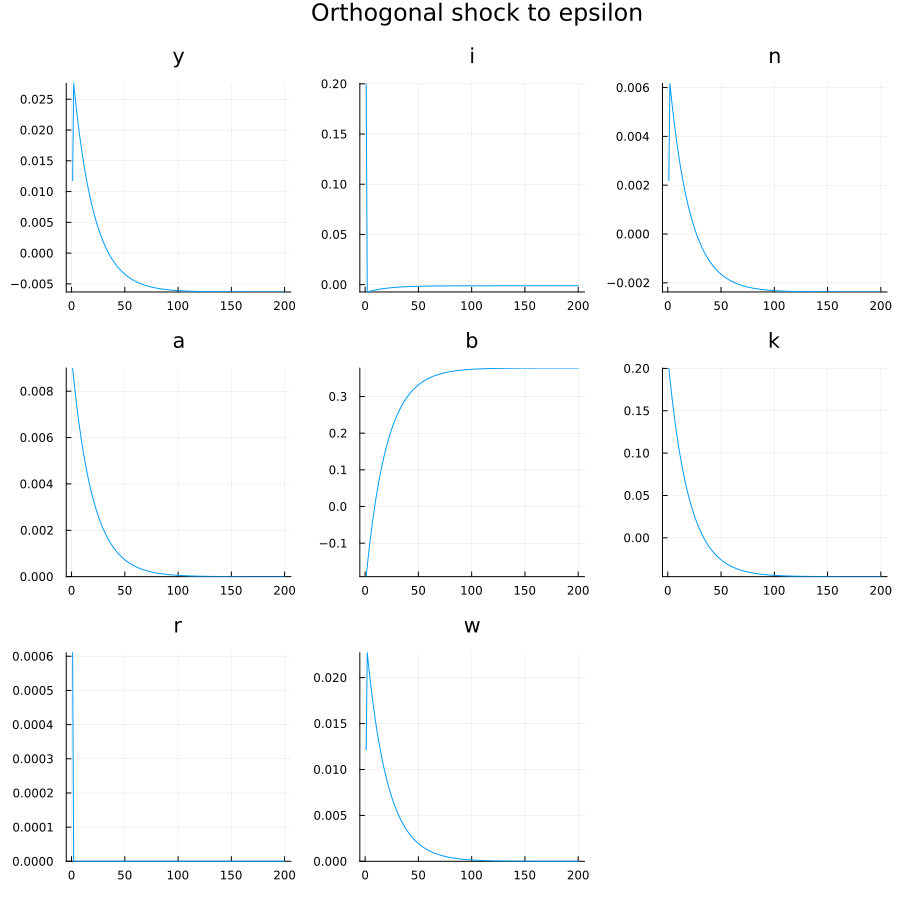
>
> Even with a unit root, the model can be solved and simulated.
>
> Since the opening up of the economy, in response to the productivity
> shock capital flows in to finance a jump in investment.
>
> The irfs show a persistent effect of the shock on the debt position,
> as well as most other variables.
>
> When the savings of all households increase, there is no stabilizing
> force to bring them back to their original level.
>
> Households and as a result the whole country behaves like a ricardian
> agent: they increase their consumption permanently by consuming the
> interests on their assets.
>
> Since their consumption increase their consumption leisure tradeoff is
> also modified, which is why the labour supply is also permanently
> changed.
>
> Since the return on capital must be kept equal to world interest rate
> (by the arbitrage condition), it returns to the steady-state after one
> period.

**Assume the foreign interest rate depends on the amount of foreign
assets**

$$r^{\star}_t=\frac{1}{\beta} + exp(-\kappa b^{\star}_t) - 1$$

**with $\kappa=0.001$. How do you interpret the equation for
$r^{\star}_t$. How should you modify the model equations?**

> **Correction**
>
> With this specification, when the representative housheold holds more
> assets, their return decrease. This could be a proxy for the fact that
> international markets have limited depth.
>
> Conversely, when the domestic household become more indebted,
> international lenders require a higher interest rate. In that case, it
> could mean that international investors don’t have infinitely deep
> pockets or interpreted as a higher risk premium.
>
> The precise specification is also chosen so that it collapses to the
> $r^{\star}=\frac{1}{\beta}$ when $b^{\star}_t=0$. This allows us to
> keep essentially the same steady-state as before for all other
> variables.
>
> To update the modfile, we need to declare $r^{\star}$ as a variable
> not a parameter and move its steady-state value
> $r^{\star} = \frac{1}{β}$ to the block `steady_state_model;`. Finally
> the above equation endogenizing the interest rate must augment the
> `model;` block.
>
> Note that the Euler equation is unchanged by the addition of the
> endogenous interest rate. This is because the households (and as a
> result the representative household) does not internalize the effect
> of its borrowing/saving on the interest rate when it chooses its
> optimal decisions.

**Update the modfile and comment on the generated moments. Do they
depend on the choice of $\kappa$?**

In [2]:
using Dynare 
#run modified modfile rbc_open_stationary
# save result for future comparison
context_stationary = @dynare "rbc_open_stationary.mod";

Dynare version: 0.9.18
2025-04-16T13:56:28.671: Starting @dynare rbc_open_stationary.mod
["rbc_open_stationary.mod", "language=julia", "json=compute"]
Dynare preprocessor version: 6.4.0+0
2025-04-16T13:56:28.677: End of preprocessing
2025-04-16T13:56:28.680: Start parse_statements!

Starting preprocessing of the model file ...
Found 10 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 9 equation(s)
                                 and 7 feedback variable(s).
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Finding the optimal block decomposition of the dynamic model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 9 equation(s)
                                 and 8 feedback variable(s).
JSON written after Computing step.
Preprocessing completed.




  Coefficients of approximate solution function (reduced form)

───────────┬──────────────────────────────────────────────────────────────────────────────────────
           │   k_t      i_t      y_t    a_t     n_t       c_t       b_t      r_t     w_t    rst_t
──────────────────────────────────────────────────────────────────────────────────────────────────
      ϕ(k) │ -0.0636  -1.0386   0.0575   0.0   0.0068  0.0251     1.071  -0.0042  0.0801  -0.0011
      ϕ(a) │ 13.9608  13.9608   1.1113  0.95   0.1565  0.4015   -13.251   0.0576  1.4121   0.0133
      ϕ(b) │ -0.0614  -0.0614  -0.0241   0.0  -0.0135  0.0242    1.0336  -0.0012  0.0241   -0.001
 epsilon_t │ 14.6956  14.6956   1.1698   1.0   0.1648  0.4227  -13.9484   0.0606  1.4864   0.0139
───────────┴──────────────────────────────────────────────────────────────────────────────────────

  Note: ϕ(x) = x_{t-1} - steady_state(x)

  THEORETICAL MOMENTS

──────────┬─────────────────────────────
 VARIABLE │  MEAN   STD. DEV.  VARIANCE
──

2025-04-16T13:56:28.952: End parse_statements!
2025-04-16T13:56:28.952: End parser

> **Correction**
>
> With the addition of a small friction we obtain the well defined
> following moments:
>
>       THEORETICAL MOMENTS
>
>     ──────────┬─────────────────────────────
>      VARIABLE │  MEAN   STD. DEV.  VARIANCE
>     ────────────────────────────────────────
>             k │ 6.3702     0.3979    0.1583
>             i │ 0.1593     0.1329    0.0177
>             y │ 0.8765      0.057    0.0033
>             a │    1.0     0.0288    0.0008
>             n │   0.33     0.0109    0.0001
>             c │ 0.7173     0.0272    0.0007
>             b │    0.0     0.6257    0.3914
>             r │ 0.0454     0.0008       0.0
>             w │ 1.7797      0.076    0.0058
>           rst │ 1.0204     0.0006       0.0
>     ──────────┴─────────────────────────────
>
> We obtain the following irf:
>
> 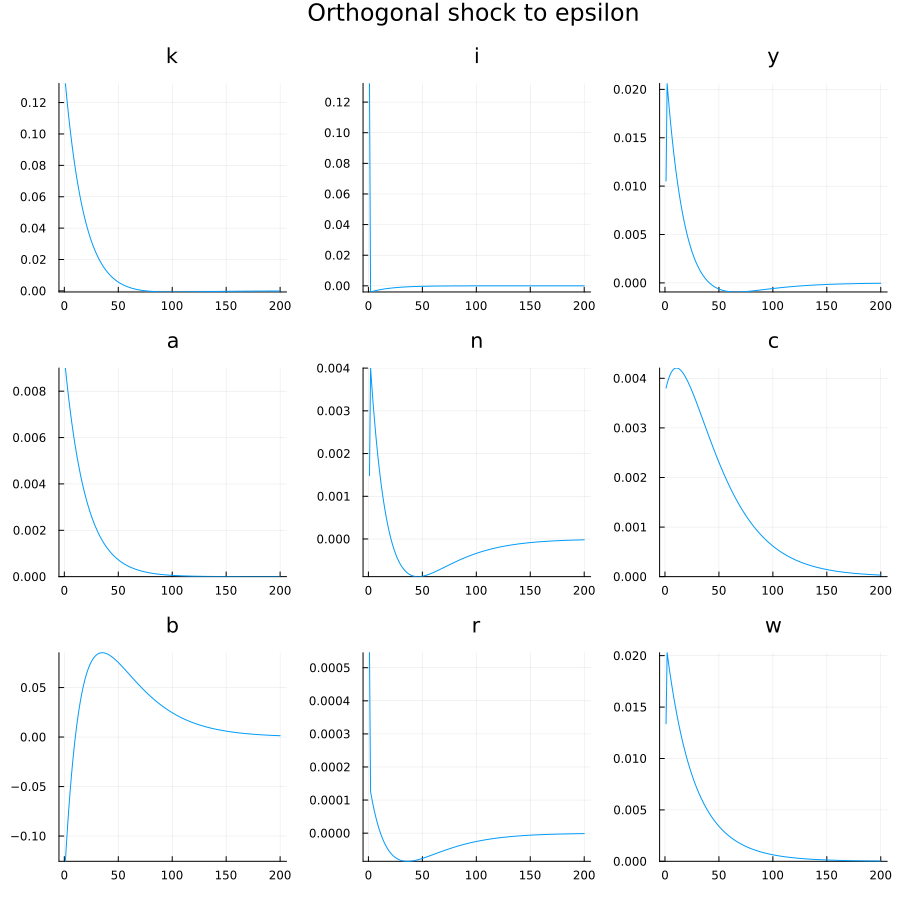
>
> As before there is a jump in investment, financed by external
> borrowing ($b$ becomes negative). Since effect is slowed down by an
> increase in the interest rate.

> **Correction**
>
> If we set $\kappa=0.005$ instead we obtain the following theoretical
> moments:
>
>       THEORETICAL MOMENTS
>
>     ──────────┬────────────────────────────────────────────────────────
>      VARIABLE │  STD. DEV. (kappa=0.001)       STD. DEV. (kappa=0.005)      
>     ───────────────────────────────────────────────────────────────────
>             k │           0.3979                       0.4371       
>             i │           0.1329                       0.1551       
>             y │            0.057                        0.063       
>             a │           0.0288                       0.0288       
>             n │           0.0109                       0.0137       
>             c │           0.0272                       0.0272       
>             b │           0.6257                       0.9907       
>             r │           0.0008                       0.0007       
>             w │            0.076                       0.0758       
>           rst │           0.0006                       0.0005       
>     ──────────┴────────────────────────────────────────────────────────  
>
> We observe rather high increase in the volatility of debt, but milder
> changes for capital, investment, output, labour, wages… In particular
> the RBC moments (std dev of investment / consumption over std dev of
> production) move very little.
>
> Another interesting exercise consists in comparing the impulse
> response functions obtained with $\kappa=0.000$, $\kappa=0.001$ and
> $\kappa=0.005$ (see code below).
>
> In the short run, the dynamic responses are very similar for all
> variables, except consumption which does not jump anymore to its long
> run trend as long as there is a small friction on the interest rate.
> Overall the addition of the friction slows down the adjustment of
> production variables to the productivty shock.
>
> In the long run, the friction implies a return to the initial
> steady-state counteracting the short term effect of the exogenous
> shock.

In [3]:
context_stationary_high_kappa = @dynare "rbc_open_stationary_kappa05.mod";

Dynare version: 0.9.18
2025-04-16T13:56:32.457: Starting @dynare rbc_open_stationary_kappa05.mod
["rbc_open_stationary_kappa05.mod", "language=julia", "json=compute"]
Dynare preprocessor version: 6.4.0+0

Starting preprocessing of the model file ...
Found 10 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...

2025-04-16T13:56:32.463: End of preprocessing
2025-04-16T13:56:32.466: Start parse_statements!
  Coefficients of approximate solution function (reduced form)

───────────┬────────────────────────────────────────────────────────────────────────────────────
           │  k_t      i_t      y_t    a_t     n_t       c_t      b_t      r_t     w_t    rst_t
────────────────────────────────────────────────────────────────────────────────────────────────
      ϕ(k) │ 0.3486  -0.6264   0.0394   0.0  -0.0034  0.0432   0.6226  -0.0051  0.0982  -0.0031
      ϕ(a) │ 7.2694   7.2694   1.1293  0.95   0.1667  0.3834  -6.5236   0.0585  1.3941   0.0326
      ϕ(b) │ 0.3364   0.3364  -0.0415   0.0  -0.0233  0.0417   0.6008  -0.0022  0.0415   -0.003
 epsilon_t │  7.652    7.652   1.1888   1.0   0.1754  0.4036  -6.8669   0.0616  1.4674   0.0343
───────────┴────────────────────────────────────────────────────────────────────────────────────

  Note: ϕ(x) = x_{t-1} - steady_state(x)

  THEORETICAL MOMENTS

────

Finding the optimal block decomposition of the static model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 9 equation(s)
                                 and 7 feedback variable(s).
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Finding the optimal block decomposition of the dynamic model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 9 equation(s)
                                 and 8 feedback variable(s).
JSON written after Computing step.
Preprocessing completed.












2025-04-16T13:56:32.616: End parse_statements!
2025-04-16T13:56:32.616: End parser

In [4]:
irfs_kappa_00 = context.results.model_results[1].irfs[:epsilon]
irfs_kappa_01 = context_stationary.results.model_results[1].irfs[:epsilon]
irfs_kappa_05 = context_stationary_high_kappa.results.model_results[1].irfs[:epsilon]

┌────┬───────────┬──────────────┬────────────┬────────────┬──────────────┬──────
│ │ k │ i │ y │ a │ n │ ⋯
├────┼───────────┼──────────────┼────────────┼────────────┼──────────────┼──────
│ 1 │ 0.0688684 │ 0.0688684 │ 0.0106989 │ 0.009 │ 0.00157894 │ 0.0 ⋯
│ 2 │ 0.0686418 │ 0.00149511 │ 0.0154414 │ 0.00855 │ 0.00270823 │ 0.0 ⋯
│ 3 │ 0.0682637 │ 0.00133792 │ 0.0145575 │ 0.0081225 │ 0.00242788 │ 0.0 ⋯
│ 4 │ 0.0677499 │ 0.00119276 │ 0.0137234 │ 0.00771638 │ 0.00216889 │ 0.0 ⋯
│ 5 │ 0.0671149 │ 0.00105882 │ 0.0129364 │ 0.00733056 │ 0.00192981 │ 0.0 ⋯
│ 6 │ 0.0663724 │ 0.000935346 │ 0.0121938 │ 0.00696403 │ 0.0017093 │ 0.0 ⋯
│ 7 │ 0.0655347 │ 0.000821613 │ 0.0114933 │ 0.00661583 │ 0.0015061 │ 0.0 ⋯
│ 8 │ 0.0646133 │ 0.000716956 │ 0.0108323 │ 0.00628504 │ 0.00131901 │ 0.0 ⋯
│ 9 │ 0.0636187 │ 0.000620751 │ 0.0102088 │ 0.00597078 │ 0.00114694 │ 0.0 ⋯
│ 10 │ 0.0625607 │ 0.000532412 │ 0.00962061 │ 0.00567224 │ 0.000988845 │ 0.0 ⋯
│ 11 │ 0.061448 │ 0.00045139 │ 0.00906575 │ 0.00538863 │ 0.000843755 │ 0.0 ⋯
│ 12 │ 0.060289 │ 0.000377174 │ 0.00854238 │ 0.0051192 │ 0.000710761 │ 0. ⋯
│ 13 │ 0.0590911 │ 0.000309284 │ 0.00804872 │ 0.00486324 │ 0.000589014 │ 0.0 ⋯
│ 14 │ 0.0578611 │ 0.00024727 │ 0.00758312 │ 0.00462008 │ 0.000477719 │ 0.0 ⋯
│ 15 │ 0.0566052 │ 0.000190713 │ 0.00714399 │ 0.00438907 │ 0.000376133 │ 0.0 ⋯
│ 16 │ 0.0553293 │ 0.000139222 │ 0.00672985 │ 0.00416962 │ 0.000283559 │ 0.0 ⋯
│ ⋮ │ ⋮ │ ⋮ │ ⋮ │ ⋮ │ ⋮ │ ⋱
└────┴───────────┴──────────────┴────────────┴────────────┴──────────────┴──────
 5 columns and 184 rows omitted

In [6]:
using Plots
pl_b = plot(irfs_kappa_00[:b], title="Debt", label="kappa=0")
plot!(pl_b, irfs_kappa_01[:b], label="kappa=0.001")
plot!(pl_b, irfs_kappa_05[:b], label="kappa=0.005")

The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip560)" d="M243.602 1517.37 Q239.991 1517.37 238.163 1520.93 Q236.357 1524.47 236.357 1531.6 Q236.357 1538.71 238.163 1542.27 Q239.991 1545.82 243.602 1545.82 Q247.237 1545.82 249.042 1542.27 Q250.871 1538.71 250.871 1531.6 Q250.871 1524.47 249.042 1520.93 Q247.237 1517.37 243.602 1517.37 M243.602 1513.66 Q249.413 1513.66 252.468 1518.27 Q255.547 1522.85 255.547 1531.6 Q255.547 1540.33 252.468 1544.94 Q249.413 1549.52 243.602 1549.52 Q237.792 1549.52 234.714 1544.94 Q231.658 1540.33 231.658 1531.6 Q231.658 1522.85 234.714 1518.27 Q237.792 1513.66 243.602 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip560)" d="M730.307 1514.29 L748.663 1514.29 L748.663 1518.22 L734.589 1518.22 L734.589 1526.7 Q735.608 1526.35 736.626 1526.19 Q737.645 1526 738.663 1526 Q744.45 1526 747.83 1529.17 Q751.209 1532.34 751.209 1537.76 Q751.209 1543.34 747.737 1546.44 Q744.265 1549.52 737.946 1549.52 Q735.77 1549.52 733.501 1549.15 Q731.256 1548.78 728.848 1548.04 L728.848 1543.34 Q730.932 1544.47 733.154 1545.03 Q735.376 1545.58 737.853 1545.58 Q741.858 1545.58 744.195 1543.48 Q746.533 1541.37 746.533 1537.76 Q746.533 1534.15 744.195 1532.04 Q741.858 1529.94 737.853 1529.94 Q735.978 1529.94 734.103 1530.35 Q732.251 1530.77 730.307 1531.65 L730.307 1514.29 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip560)" d="M770.422 1517.37 Q766.811 1517.37 764.982 1520.93 Q763.177 1524.47 763.177 1531.6 Q763.177 1538.71 764.982 1542.27 Q766.811 1545.82 770.422 1545.82 Q774.056 1545.82 775.862 1542.27 Q777.691 1538.71 777.691 1531.6 Q777.691 1524.47 775.862 1520.93 Q774.056 1517.37 770.422 1517.37 M770.422 1513.66 Q776.232 1513.66 779.288 1518.27 Q782.367 1522.85 782.367 1531.6 Q782.367 1540.33 779.288 1544.94 Q776.232 1549.52 770.422 1549.52 Q764.612 1549.52 761.533 1544.94 Q758.478 1540.33 758.478 1531.6 Q758.478 1522.85 761.533 1518.27 Q764.612 1513.66 770.422 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip560)" d="M1266.57 1517.37 Q1262.96 1517.37 1261.13 1520.93 Q1259.33 1524.47 1259.33 1531.6 Q1259.33 1538.71 1261.13 1542.27 Q1262.96 1545.82 1266.57 1545.82 Q1270.21 1545.82 1272.01 1542.27 Q1273.84 1538.71 1273.84 1531.6 Q1273.84 1524.47 1272.01 1520.93 Q1270.21 1517.37 1266.57 1517.37 M1266.57 1513.66 Q1272.38 1513.66 1275.44 1518.27 Q1278.52 1522.85 1278.52 1531.6 Q1278.52 1540.33 1275.44 1544.94 Q1272.38 1549.52 1266.57 1549.52 Q1260.76 1549.52 1257.68 1544.94 Q1254.63 1540.33 1254.63 1531.6 Q1254.63 1522.85 1257.68 1518.27 Q1260.76 1513.66 1266.57 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip560)" d="M1296.73 1517.37 Q1293.12 1517.37 1291.29 1520.93 Q1289.49 1524.47 1289.49 1531.6 Q1289.49 1538.71 1291.29 1542.27 Q1293.12 1545.82 1296.73 1545.82 Q1300.37 1545.82 1302.17 1542.27 Q1304 1538.71 1304 1531.6 Q1304 1524.47 1302.17 1520.93 Q1300.37 1517.37 1296.73 1517.37 M1296.73 1513.66 Q1302.54 1513.66 1305.6 1518.27 Q1308.68 1522.85 1308.68 1531.6 Q1308.68 1540.33 1305.6 1544.94 Q1302.54 1549.52 1296.73 1549.52 Q1290.92 1549.52 1287.84 1544.94 Q1284.79 1540.33 1284.79 1531.6 Q1284.79 1522.85 1287.84 1518.27 Q1290.92 1513.66 1296.73 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip560)" d="M1768.62 1514.29 L1786.98 1514.29 L1786.98 1518.22 L1772.9 1518.22 L1772.9 1526.7 Q1773.92 1526.35 1774.94 1526.19 Q1775.96 1526 1776.98 1526 Q1782.77 1526 1786.15 1529.17 Q1789.52 1532.34 1789.52 1537.76 Q1789.52 1543.34 1786.05 1546.44 Q1782.58 1549.52 1776.26 1549.52 Q1774.09 1549.52 1771.82 1549.15 Q1769.57 1548.78 1767.16 1548.04 L1767.16 1543.34 Q1769.25 1544.47 1771.47 1545.03 Q1773.69 1545.58 1776.17 1545.58 Q1780.17 1545.58 1782.51 1543.48 Q1784.85 1541.37 1784.85 1537.76 Q1784.85 1534.15 1782.51 1532.04 Q1780.17 1529.94 177

In [7]:
using Plots
pl_y = plot(irfs_kappa_00[:y], title="Production", label="kappa=0")
plot!(pl_y, irfs_kappa_01[:y], label="kappa=0.001")
plot!(pl_y, irfs_kappa_05[:y], label="kappa=0.005")

The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip650)" d="M302.731 1517.37 Q299.12 1517.37 297.291 1520.93 Q295.486 1524.47 295.486 1531.6 Q295.486 1538.71 297.291 1542.27 Q299.12 1545.82 302.731 1545.82 Q306.365 1545.82 308.171 1542.27 Q309.999 1538.71 309.999 1531.6 Q309.999 1524.47 308.171 1520.93 Q306.365 1517.37 302.731 1517.37 M302.731 1513.66 Q308.541 1513.66 311.597 1518.27 Q314.675 1522.85 314.675 1531.6 Q314.675 1540.33 311.597 1544.94 Q308.541 1549.52 302.731 1549.52 Q296.921 1549.52 293.842 1544.94 Q290.787 1540.33 290.787 1531.6 Q290.787 1522.85 293.842 1518.27 Q296.921 1513.66 302.731 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip650)" d="M775.081 1514.29 L793.438 1514.29 L793.438 1518.22 L779.364 1518.22 L779.364 1526.7 Q780.382 1526.35 781.401 1526.19 Q782.419 1526 783.438 1526 Q789.225 1526 792.605 1529.17 Q795.984 1532.34 795.984 1537.76 Q795.984 1543.34 792.512 1546.44 Q789.04 1549.52 782.72 1549.52 Q780.544 1549.52 778.276 1549.15 Q776.031 1548.78 773.623 1548.04 L773.623 1543.34 Q775.706 1544.47 777.929 1545.03 Q780.151 1545.58 782.628 1545.58 Q786.632 1545.58 788.97 1543.48 Q791.308 1541.37 791.308 1537.76 Q791.308 1534.15 788.97 1532.04 Q786.632 1529.94 782.628 1529.94 Q780.753 1529.94 778.878 1530.35 Q777.026 1530.77 775.081 1531.65 L775.081 1514.29 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip650)" d="M815.197 1517.37 Q811.586 1517.37 809.757 1520.93 Q807.952 1524.47 807.952 1531.6 Q807.952 1538.71 809.757 1542.27 Q811.586 1545.82 815.197 1545.82 Q818.831 1545.82 820.637 1542.27 Q822.465 1538.71 822.465 1531.6 Q822.465 1524.47 820.637 1520.93 Q818.831 1517.37 815.197 1517.37 M815.197 1513.66 Q821.007 1513.66 824.063 1518.27 Q827.141 1522.85 827.141 1531.6 Q827.141 1540.33 824.063 1544.94 Q821.007 1549.52 815.197 1549.52 Q809.387 1549.52 806.308 1544.94 Q803.253 1540.33 803.253 1531.6 Q803.253 1522.85 806.308 1518.27 Q809.387 1513.66 815.197 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip650)" d="M1296.99 1517.37 Q1293.38 1517.37 1291.55 1520.93 Q1289.75 1524.47 1289.75 1531.6 Q1289.75 1538.71 1291.55 1542.27 Q1293.38 1545.82 1296.99 1545.82 Q1300.63 1545.82 1302.43 1542.27 Q1304.26 1538.71 1304.26 1531.6 Q1304.26 1524.47 1302.43 1520.93 Q1300.63 1517.37 1296.99 1517.37 M1296.99 1513.66 Q1302.8 1513.66 1305.86 1518.27 Q1308.94 1522.85 1308.94 1531.6 Q1308.94 1540.33 1305.86 1544.94 Q1302.8 1549.52 1296.99 1549.52 Q1291.18 1549.52 1288.1 1544.94 Q1285.05 1540.33 1285.05 1531.6 Q1285.05 1522.85 1288.1 1518.27 Q1291.18 1513.66 1296.99 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip650)" d="M1327.15 1517.37 Q1323.54 1517.37 1321.71 1520.93 Q1319.91 1524.47 1319.91 1531.6 Q1319.91 1538.71 1321.71 1542.27 Q1323.54 1545.82 1327.15 1545.82 Q1330.79 1545.82 1332.59 1542.27 Q1334.42 1538.71 1334.42 1531.6 Q1334.42 1524.47 1332.59 1520.93 Q1330.79 1517.37 1327.15 1517.37 M1327.15 1513.66 Q1332.96 1513.66 1336.02 1518.27 Q1339.1 1522.85 1339.1 1531.6 Q1339.1 1540.33 1336.02 1544.94 Q1332.96 1549.52 1327.15 1549.52 Q1321.34 1549.52 1318.27 1544.94 Q1315.21 1540.33 1315.21 1531.6 Q1315.21 1522.85 1318.27 1518.27 Q1321.34 1513.66 1327.15 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip650)" d="M1784.69 1514.29 L1803.05 1514.29 L1803.05 1518.22 L1788.97 1518.22 L1788.97 1526.7 Q1789.99 1526.35 1791.01 1526.19 Q1792.03 1526 1793.05 1526 Q1798.83 1526 1802.21 1529.17 Q1805.59 1532.34 1805.59 1537.76 Q1805.59 1543.34 1802.12 1546.44 Q1798.65 1549.52 1792.33 1549.52 Q1790.15 1549.52 1787.88 1549.15 Q1785.64 1548.78 1783.23 1548.04 L1783.23 1543.34 Q1785.31 1544.47 1787.54 1545.03 Q1789.76 1545.58 1792.24 1545.58 Q1796.24 1545.58 1798.58 1543.48 Q1800.92 1541.37 1800.92 1537.76 Q1800.92 1534.15 1798.58 1532.04 Q1796.24 1529.9

In [8]:
using Plots
pl_c = plot(irfs_kappa_00[:c], title="Consumption", label="kappa=0")
plot!(pl_c, irfs_kappa_01[:c], label="kappa=0.001")
plot!(pl_c, irfs_kappa_05[:c], label="kappa=0.005")

The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip740)" d="M267.245 1517.37 Q263.634 1517.37 261.805 1520.93 Q259.999 1524.47 259.999 1531.6 Q259.999 1538.71 261.805 1542.27 Q263.634 1545.82 267.245 1545.82 Q270.879 1545.82 272.685 1542.27 Q274.513 1538.71 274.513 1531.6 Q274.513 1524.47 272.685 1520.93 Q270.879 1517.37 267.245 1517.37 M267.245 1513.66 Q273.055 1513.66 276.11 1518.27 Q279.189 1522.85 279.189 1531.6 Q279.189 1540.33 276.11 1544.94 Q273.055 1549.52 267.245 1549.52 Q261.435 1549.52 258.356 1544.94 Q255.3 1540.33 255.3 1531.6 Q255.3 1522.85 258.356 1518.27 Q261.435 1513.66 267.245 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip740)" d="M748.21 1514.29 L766.566 1514.29 L766.566 1518.22 L752.492 1518.22 L752.492 1526.7 Q753.511 1526.35 754.529 1526.19 Q755.548 1526 756.566 1526 Q762.353 1526 765.733 1529.17 Q769.112 1532.34 769.112 1537.76 Q769.112 1543.34 765.64 1546.44 Q762.168 1549.52 755.849 1549.52 Q753.673 1549.52 751.404 1549.15 Q749.159 1548.78 746.751 1548.04 L746.751 1543.34 Q748.835 1544.47 751.057 1545.03 Q753.279 1545.58 755.756 1545.58 Q759.761 1545.58 762.099 1543.48 Q764.437 1541.37 764.437 1537.76 Q764.437 1534.15 762.099 1532.04 Q759.761 1529.94 755.756 1529.94 Q753.881 1529.94 752.006 1530.35 Q750.154 1530.77 748.21 1531.65 L748.21 1514.29 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip740)" d="M788.325 1517.37 Q784.714 1517.37 782.885 1520.93 Q781.08 1524.47 781.08 1531.6 Q781.08 1538.71 782.885 1542.27 Q784.714 1545.82 788.325 1545.82 Q791.96 1545.82 793.765 1542.27 Q795.594 1538.71 795.594 1531.6 Q795.594 1524.47 793.765 1520.93 Q791.96 1517.37 788.325 1517.37 M788.325 1513.66 Q794.135 1513.66 797.191 1518.27 Q800.27 1522.85 800.27 1531.6 Q800.27 1540.33 797.191 1544.94 Q794.135 1549.52 788.325 1549.52 Q782.515 1549.52 779.436 1544.94 Q776.381 1540.33 776.381 1531.6 Q776.381 1522.85 779.436 1518.27 Q782.515 1513.66 788.325 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip740)" d="M1278.73 1517.37 Q1275.12 1517.37 1273.29 1520.93 Q1271.49 1524.47 1271.49 1531.6 Q1271.49 1538.71 1273.29 1542.27 Q1275.12 1545.82 1278.73 1545.82 Q1282.37 1545.82 1284.17 1542.27 Q1286 1538.71 1286 1531.6 Q1286 1524.47 1284.17 1520.93 Q1282.37 1517.37 1278.73 1517.37 M1278.73 1513.66 Q1284.54 1513.66 1287.6 1518.27 Q1290.68 1522.85 1290.68 1531.6 Q1290.68 1540.33 1287.6 1544.94 Q1284.54 1549.52 1278.73 1549.52 Q1272.92 1549.52 1269.85 1544.94 Q1266.79 1540.33 1266.79 1531.6 Q1266.79 1522.85 1269.85 1518.27 Q1272.92 1513.66 1278.73 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip740)" d="M1308.9 1517.37 Q1305.29 1517.37 1303.46 1520.93 Q1301.65 1524.47 1301.65 1531.6 Q1301.65 1538.71 1303.46 1542.27 Q1305.29 1545.82 1308.9 1545.82 Q1312.53 1545.82 1314.34 1542.27 Q1316.16 1538.71 1316.16 1531.6 Q1316.16 1524.47 1314.34 1520.93 Q1312.53 1517.37 1308.9 1517.37 M1308.9 1513.66 Q1314.71 1513.66 1317.76 1518.27 Q1320.84 1522.85 1320.84 1531.6 Q1320.84 1540.33 1317.76 1544.94 Q1314.71 1549.52 1308.9 1549.52 Q1303.09 1549.52 1300.01 1544.94 Q1296.95 1540.33 1296.95 1531.6 Q1296.95 1522.85 1300.01 1518.27 Q1303.09 1513.66 1308.9 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip740)" d="M1775.05 1514.29 L1793.4 1514.29 L1793.4 1518.22 L1779.33 1518.22 L1779.33 1526.7 Q1780.35 1526.35 1781.37 1526.19 Q1782.38 1526 1783.4 1526 Q1789.19 1526 1792.57 1529.17 Q1795.95 1532.34 1795.95 1537.76 Q1795.95 1543.34 1792.48 1546.44 Q1789 1549.52 1782.69 1549.52 Q1780.51 1549.52 1778.24 1549.15 Q1776 1548.78 1773.59 1548.04 L1773.59 1543.34 Q1775.67 1544.47 1777.89 1545.03 Q1780.12 1545.58 1782.59 1545.58 Q1786.6 1545.58 1788.94 1543.48 Q1791.27 1541.37 1791.27 1537.76 Q1791.27 1534.15 1788.94 1532.04 Q1786.6 1529.94 1782.59 1529.94 Q1780.72 1529.94 1778

In [9]:
using Plots
pl_i = plot(irfs_kappa_00[:i], title="Investment", label="kappa=0")
plot!(pl_i, irfs_kappa_01[:i], label="kappa=0.001")
plot!(pl_i, irfs_kappa_05[:i], label="kappa=0.005")

The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip830)" d="M237.319 1517.37 Q233.708 1517.37 231.879 1520.93 Q230.074 1524.47 230.074 1531.6 Q230.074 1538.71 231.879 1542.27 Q233.708 1545.82 237.319 1545.82 Q240.953 1545.82 242.759 1542.27 Q244.587 1538.71 244.587 1531.6 Q244.587 1524.47 242.759 1520.93 Q240.953 1517.37 237.319 1517.37 M237.319 1513.66 Q243.129 1513.66 246.185 1518.27 Q249.263 1522.85 249.263 1531.6 Q249.263 1540.33 246.185 1544.94 Q243.129 1549.52 237.319 1549.52 Q231.509 1549.52 228.43 1544.94 Q225.375 1540.33 225.375 1531.6 Q225.375 1522.85 228.43 1518.27 Q231.509 1513.66 237.319 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip830)" d="M725.548 1514.29 L743.905 1514.29 L743.905 1518.22 L729.831 1518.22 L729.831 1526.7 Q730.849 1526.35 731.868 1526.19 Q732.886 1526 733.905 1526 Q739.692 1526 743.072 1529.17 Q746.451 1532.34 746.451 1537.76 Q746.451 1543.34 742.979 1546.44 Q739.507 1549.52 733.187 1549.52 Q731.011 1549.52 728.743 1549.15 Q726.498 1548.78 724.09 1548.04 L724.09 1543.34 Q726.173 1544.47 728.396 1545.03 Q730.618 1545.58 733.095 1545.58 Q737.099 1545.58 739.437 1543.48 Q741.775 1541.37 741.775 1537.76 Q741.775 1534.15 739.437 1532.04 Q737.099 1529.94 733.095 1529.94 Q731.22 1529.94 729.345 1530.35 Q727.493 1530.77 725.548 1531.65 L725.548 1514.29 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip830)" d="M765.664 1517.37 Q762.053 1517.37 760.224 1520.93 Q758.419 1524.47 758.419 1531.6 Q758.419 1538.71 760.224 1542.27 Q762.053 1545.82 765.664 1545.82 Q769.298 1545.82 771.104 1542.27 Q772.932 1538.71 772.932 1531.6 Q772.932 1524.47 771.104 1520.93 Q769.298 1517.37 765.664 1517.37 M765.664 1513.66 Q771.474 1513.66 774.53 1518.27 Q777.608 1522.85 777.608 1531.6 Q777.608 1540.33 774.53 1544.94 Q771.474 1549.52 765.664 1549.52 Q759.854 1549.52 756.775 1544.94 Q753.72 1540.33 753.72 1531.6 Q753.72 1522.85 756.775 1518.27 Q759.854 1513.66 765.664 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip830)" d="M1263.34 1517.37 Q1259.73 1517.37 1257.9 1520.93 Q1256.09 1524.47 1256.09 1531.6 Q1256.09 1538.71 1257.9 1542.27 Q1259.73 1545.82 1263.34 1545.82 Q1266.97 1545.82 1268.78 1542.27 Q1270.61 1538.71 1270.61 1531.6 Q1270.61 1524.47 1268.78 1520.93 Q1266.97 1517.37 1263.34 1517.37 M1263.34 1513.66 Q1269.15 1513.66 1272.2 1518.27 Q1275.28 1522.85 1275.28 1531.6 Q1275.28 1540.33 1272.2 1544.94 Q1269.15 1549.52 1263.34 1549.52 Q1257.53 1549.52 1254.45 1544.94 Q1251.39 1540.33 1251.39 1531.6 Q1251.39 1522.85 1254.45 1518.27 Q1257.53 1513.66 1263.34 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip830)" d="M1293.5 1517.37 Q1289.89 1517.37 1288.06 1520.93 Q1286.25 1524.47 1286.25 1531.6 Q1286.25 1538.71 1288.06 1542.27 Q1289.89 1545.82 1293.5 1545.82 Q1297.13 1545.82 1298.94 1542.27 Q1300.77 1538.71 1300.77 1531.6 Q1300.77 1524.47 1298.94 1520.93 Q1297.13 1517.37 1293.5 1517.37 M1293.5 1513.66 Q1299.31 1513.66 1302.37 1518.27 Q1305.44 1522.85 1305.44 1531.6 Q1305.44 1540.33 1302.37 1544.94 Q1299.31 1549.52 1293.5 1549.52 Q1287.69 1549.52 1284.61 1544.94 Q1281.56 1540.33 1281.56 1531.6 Q1281.56 1522.85 1284.61 1518.27 Q1287.69 1513.66 1293.5 1513.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip830)" d="M1766.91 1514.29 L1785.27 1514.29 L1785.27 1518.22 L1771.2 1518.22 L1771.2 1526.7 Q1772.22 1526.35 1773.23 1526.19 Q1774.25 1526 1775.27 1526 Q1781.06 1526 1784.44 1529.17 Q1787.82 1532.34 1787.82 1537.76 Q1787.82 1543.34 1784.35 1546.44 Q1780.87 1549.52 1774.55 1549.52 Q1772.38 1549.52 1770.11 1549.15 Q1767.86 1548.78 1765.46 1548.04 L1765.46 1543.34 Q1767.54 1544.47 1769.76 1545.03 Q1771.98 1545.58 1774.46 1545.58 Q1778.47 1545.58 1780.8 1543.48 Q1783.14 1541.37 1783.14 1537.76 Q1783.14 1534.15 1780.8 1532.04 Q1778.47 1529.94 1774.46 1529.

In [10]:
plot(pl_b, pl_y, pl_c, pl_i)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip920)" d="M238.543 717.367 Q234.932 717.367 233.103 720.931 Q231.298 724.473 231.298 731.603 Q231.298 738.709 233.103 742.274 Q234.932 745.815 238.543 745.815 Q242.177 745.815 243.983 742.274 Q245.812 738.709 245.812 731.603 Q245.812 724.473 243.983 720.931 Q242.177 717.367 238.543 717.367 M238.543 713.663 Q244.353 713.663 247.409 718.269 Q250.488 722.853 250.488 731.603 Q250.488 740.329 247.409 744.936 Q244.353 749.519 238.543 749.519 Q232.733 749.519 229.654 744.936 Q226.599 740.329 226.599 731.603 Q226.599 722.853 229.654 718.269 Q232.733 713.663 238.543 713.663 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip920)" d="M430.76 714.288 L449.116 714.288 L449.116 718.223 L435.042 718.223 L435.042 726.695 Q436.061 726.348 437.079 726.186 Q438.098 726.001 439.116 726.001 Q444.903 726.001 448.283 729.172 Q451.663 732.343 451.663 737.76 Q451.663 743.339 448.19 746.44 Q444.718 749.519 438.399 749.519 Q436.223 749.519 433.954 749.149 Q431.709 748.778 429.302 748.038 L429.302 743.339 Q431.385 744.473 433.607 745.028 Q435.829 745.584 438.306 745.584 Q442.311 745.584 444.649 743.478 Q446.987 741.371 446.987 737.76 Q446.987 734.149 444.649 732.042 Q442.311 729.936 438.306 729.936 Q436.431 729.936 434.556 730.353 Q432.704 730.769 430.76 731.649 L430.76 714.288 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip920)" d="M470.875 717.367 Q467.264 717.367 465.436 720.931 Q463.63 724.473 463.63 731.603 Q463.63 738.709 465.436 742.274 Q467.264 745.815 470.875 745.815 Q474.51 745.815 476.315 742.274 Q478.144 738.709 478.144 731.603 Q478.144 724.473 476.315 720.931 Q474.51 717.367 470.875 717.367 M470.875 713.663 Q476.686 713.663 479.741 718.269 Q482.82 722.853 482.82 731.603 Q482.82 740.329 479.741 744.936 Q476.686 749.519 470.875 749.519 Q465.065 749.519 461.987 744.936 Q458.931 740.329 458.931 731.603 Q458.931 722.853 461.987 718.269 Q465.065 713.663 470.875 713.663 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip920)" d="M672.537 717.367 Q668.925 717.367 667.097 720.931 Q665.291 724.473 665.291 731.603 Q665.291 738.709 667.097 742.274 Q668.925 745.815 672.537 745.815 Q676.171 745.815 677.976 742.274 Q679.805 738.709 679.805 731.603 Q679.805 724.473 677.976 720.931 Q676.171 717.367 672.537 717.367 M672.537 713.663 Q678.347 713.663 681.402 718.269 Q684.481 722.853 684.481 731.603 Q684.481 740.329 681.402 744.936 Q678.347 749.519 672.537 749.519 Q666.726 749.519 663.648 744.936 Q660.592 740.329 660.592 731.603 Q660.592 722.853 663.648 718.269 Q666.726 713.663 672.537 713.663 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip920)" d="M702.698 717.367 Q699.087 717.367 697.259 720.931 Q695.453 724.473 695.453 731.603 Q695.453 738.709 697.259 742.274 Q699.087 745.815 702.698 745.815 Q706.333 745.815 708.138 742.274 Q709.967 738.709 709.967 731.603 Q709.967 724.473 708.138 720.931 Q706.333 717.367 702.698 717.367 M702.698 713.663 Q708.509 713.663 711.564 718.269 Q714.643 722.853 714.643 731.603 Q714.643 740.329 711.564 744.936 Q708.509 749.519 702.698 749.519 Q696.888 749.519 693.81 744.936 Q690.754 740.329 690.754 731.603 Q690.754 722.853 693.81 718.269 Q696.888 713.663 702.698 713.663 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip920)" d="M880.1 714.288 L898.457 714.288 L898.457 718.223 L884.383 718.223 L884.383 726.695 Q885.401 726.348 886.42 726.186 Q887.438 726.001 888.457 726.001 Q894.244 726.001 897.623 729.172 Q901.003 732.343 901.003 737.76 Q901.003 743.339 897.531 746.44 Q894.059 749.519 887.739 749.519 Q885.563 749.519 883.295 749.149 Q881.049 748.778 878.642 748.038 L878.642 743.339 Q880.725 744.473 882.948 745.028 Q885.17 745.584 887.647 745.584 Q891.651 745.584 893.989 743.478 Q896.327 741.371 896.327 737.76 Q896.327 734.149 893.989 